In [25]:
import plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import ARMA
from matplotlib.pyplot import figure
from plotly import graph_objs as go

plotly.tools.set_credentials_file(username='sobriquet', api_key='VP1HFWWFgXKkknoVFtgs')
plotly.offline.init_notebook_mode(connected=True)

In [26]:
data = pd.read_csv("../data/task2.csv")
data.head()

period  actual  forecast  previous
0  Сен ' 08    -2.5      -0.7      -4.0
1  Окт ' 08    -5.1      -4.0      -2.5
2  Ноя ' 08    -4.6      -2.5      -5.1
3  Дек ' 08    -3.9      -3.0      -4.6
4  Янв ' 09    -1.9      -3.5      -3.9

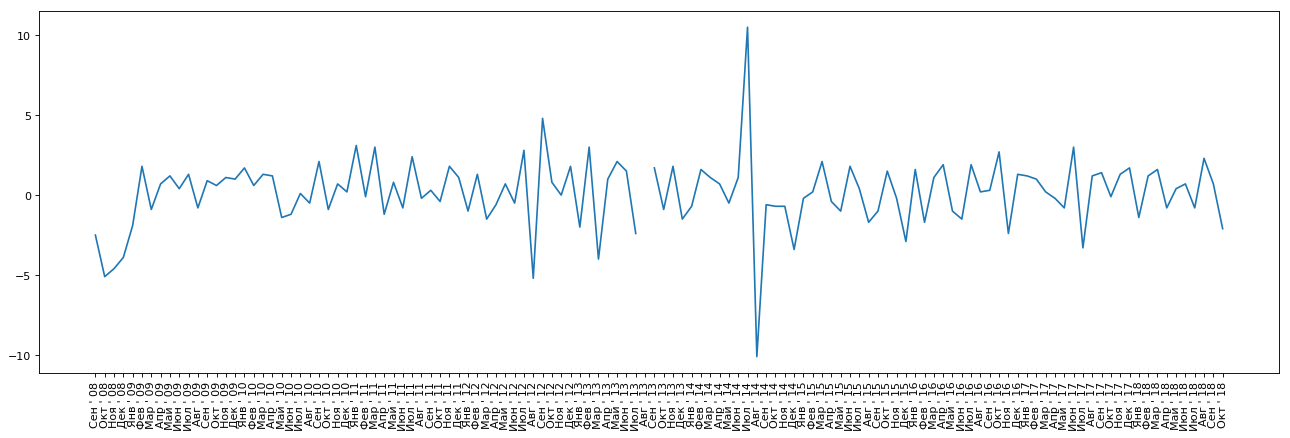

In [35]:
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data.period, data.actual)
plt.xticks(data.period, rotation=90);

In [36]:
data = [go.Scatter(
                    x=df.period,
                    y=df.actual)]
plotly.offline.iplot(data)

In [37]:
plt.plot(acf(data.actual))

AttributeError: 'list' object has no attribute 'actual'

In [18]:
data = [go.Bar(y=pd.DataFrame(acf(df.actual.apply(float)))[0])]
plotly.offline.iplot(data)

In [13]:
data = [go.Bar(y=pd.DataFrame(pacf(df['Факт'].apply(float)))[0])]
plotly.offline.iplot(data)

AR(2),AR(3)

In [14]:
data = [go.Scatter(
                    x=df['Дата'],
                    y=df['Факт'].apply(float).diff())]
#plotly.offline.iplot(data)

In [25]:
df['Факт'] = df['Факт'].apply(float)#.diff()

In [26]:
X = df['Факт']

In [27]:
model = ARMA(X, (2,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]

In [30]:
print(model_fit.aic)

897.144732860311
897.144732860311


In [31]:
model = ARMA(X, (12,0))
model_fit = model.fit(disp=0)
print(model_fit.aic)

889.4893481379603
889.4893481379603


In [34]:
model = ARMA(X, (6,0))
model_fit = model.fit(disp=0)
print(model_fit.aic)

887.244979757061
887.244979757061


In [33]:
model = ARMA(X, (3,0))
model_fit = model.fit(disp=0)
print(model_fit.aic)

898.8919934328637
898.8919934328637


In [35]:
errors = model.geterrors(model_fit.params)

In [36]:
from statsmodels.api import qqplot

In [37]:
errors

array([ 2.64847732e+00, -4.13430869e+00,  1.91819406e+00,  1.96065012e+00,
        2.22049479e+00, -1.84370246e+00,  1.13980061e+00, -8.44544707e-02,
       -1.57936991e+00,  1.40414601e+00,  8.95951341e-01, -2.16768831e+00,
       -6.51873195e-01, -2.15322733e-01,  1.31982487e+00,  1.51806436e+00,
       -5.17713664e-01,  1.52618835e+00,  3.62655814e+00, -3.68055250e+00,
        1.66049211e+00, -7.95172611e-01, -4.17488956e+00,  1.54684970e+00,
        2.95272766e+00,  1.95699316e+00,  2.00415441e+00,  1.40397941e+00,
        1.13712869e+00, -1.18043144e+00,  5.28055836e-02, -1.06435255e+00,
        2.33376057e+00,  2.74634895e-01,  8.67735821e-01,  1.69740208e+00,
        4.76072859e-01,  1.34142494e+00, -7.89577414e-01,  2.60197702e-01,
       -7.33721503e-01,  3.85430998e+00, -3.20022633e+00,  2.51226501e+00,
       -2.16505092e+00, -6.80988747e-01,  2.50237512e+00,  5.57836274e-01,
       -2.58474180e+00,  3.38182326e+00, -7.45169398e-01,  6.18096821e-01,
       -2.29999864e+00,  

array([ 2.64847732e+00, -4.13430869e+00,  1.91819406e+00,  1.96065012e+00,
        2.22049479e+00, -1.84370246e+00,  1.13980061e+00, -8.44544707e-02,
       -1.57936991e+00,  1.40414601e+00,  8.95951341e-01, -2.16768831e+00,
       -6.51873195e-01, -2.15322733e-01,  1.31982487e+00,  1.51806436e+00,
       -5.17713664e-01,  1.52618835e+00,  3.62655814e+00, -3.68055250e+00,
        1.66049211e+00, -7.95172611e-01, -4.17488956e+00,  1.54684970e+00,
        2.95272766e+00,  1.95699316e+00,  2.00415441e+00,  1.40397941e+00,
        1.13712869e+00, -1.18043144e+00,  5.28055836e-02, -1.06435255e+00,
        2.33376057e+00,  2.74634895e-01,  8.67735821e-01,  1.69740208e+00,
        4.76072859e-01,  1.34142494e+00, -7.89577414e-01,  2.60197702e-01,
       -7.33721503e-01,  3.85430998e+00, -3.20022633e+00,  2.51226501e+00,
       -2.16505092e+00, -6.80988747e-01,  2.50237512e+00,  5.57836274e-01,
       -2.58474180e+00,  3.38182326e+00, -7.45169398e-01,  6.18096821e-01,
       -2.29999864e+00,  

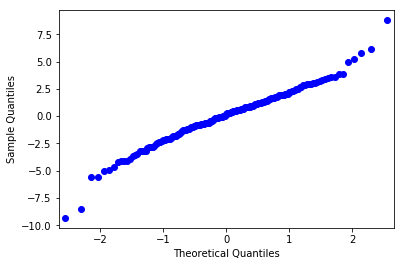

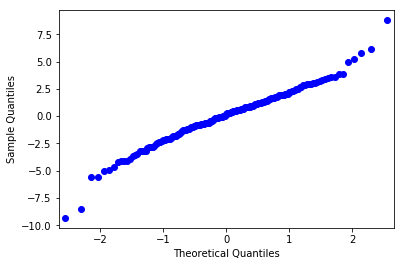

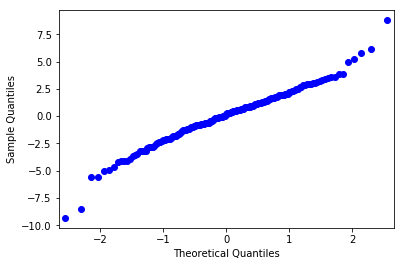

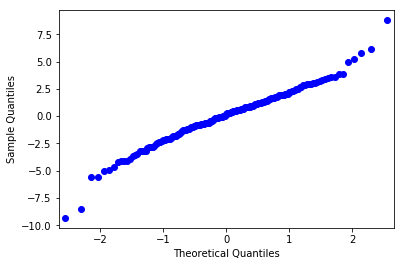

In [38]:
qqplot(errors)

In [39]:
data = [go.Bar(y=acf(pd.DataFrame(errors)[0]))]
plotly.offline.iplot(data)

In [40]:
from scipy import stats

In [41]:
stats.kstest(pd.DataFrame(errors)[0], 'norm')

KstestResult(statistic=0.1955026603451433, pvalue=9.033656258594647e-07)

KstestResult(statistic=0.1955026603451433, pvalue=9.033656258594647e-07)

In [42]:
stats.kstest(pd.DataFrame(errors)[0], 'logistic')

KstestResult(statistic=0.08054593589266468, pvalue=0.16519697505841502)

KstestResult(statistic=0.08054593589266468, pvalue=0.16519697505841502)

In [43]:
stats.kstest(pd.DataFrame(errors)[0], 'cauchy')

KstestResult(statistic=0.09753768638096516, pvalue=0.052209200041547055)

KstestResult(statistic=0.09753768638096516, pvalue=0.052209200041547055)

In [ ]:
stats.kstest(pd.DataFrame(errors)[0], 'cauchy')

In [44]:
data = [go.Histogram(x=pd.DataFrame(errors)[0], nbinsx=50)]
plotly.offline.iplot(data)

In [45]:
X.head()

0    105.3
1    100.8
2    103.6
3    105.2
4    107.0
Name: Факт, dtype: float64

0    105.3
1    100.8
2    103.6
3    105.2
4    107.0
Name: Факт, dtype: float64

In [46]:
predict = model_fit.predict(41,45, dynamic=True)
print(predict)

41    105.345690
42    104.895558
43    104.062901
44    103.774435
45    103.289944
dtype: float64
41    105.345690
42    104.895558
43    104.062901
44    103.774435
45    103.289944
dtype: float64


In [47]:
import statsmodels.stats.api as sms

conf = sms.DescrStatsW(X).tconfint_mean()

In [48]:
import math

In [49]:
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

margin_of_error = z_critical * (math.sqrt(X.std()))

z-critical value:
1.959963984540054
z-critical value:
1.959963984540054


In [50]:
margin_of_error

4.47550297298935

4.47550297298935

In [51]:
data = [go.Scatter(
                    x=df['Дата'],
                    y=df['Факт']),
        go.Scatter(
                    x=['2016-09-15','2016-10-15','2016-11-15','2016-12-15','2017-01-15'],
                    y=predict),
        go.Scatter(
                    x=['2016-09-15','2016-10-15','2016-11-15','2016-12-15','2017-01-15'],
                    y=predict+margin_of_error),
        go.Scatter(
                    x=['2016-09-15','2016-10-15','2016-11-15','2016-12-15','2017-01-15'],
                    y=predict-margin_of_error),
       ]
plotly.offline.iplot(data)